In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)
# Run below line of code for the first time to install gspread. Once installed comment it for future use
#!pip install --upgrade -q gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
from google.colab import drive
drive.mount('/content/gdrive')

filePath ="/content/gdrive/My Drive/PS_20174392719_1491204439457_log.csv"
#filePath ="/content/gdrive/My Drive/PS_Log_2K_Data"

import pandas as pd
data = pd.read_csv(filePath, sep=",", index_col=0)

df = data.sample(n=950000, random_state=random.seed(42))

print(df.info())

#outFile="/content/gdrive/My Drive/ML_TeamProject/Data950k.csv"
#df.to_csv(outFile, index=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 950000 entries, 393 to 306
Data columns (total 10 columns):
type              950000 non-null object
amount            950000 non-null float64
nameOrig          950000 non-null object
oldbalanceOrg     950000 non-null float64
newbalanceOrig    950000 non-null float64
nameDest          950000 non-null object
oldbalanceDest    950000 non-null float64
newbalanceDest    950000 non-null float64
isFraud           950000 non-null int64
isFlaggedFraud    950000 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 79.7+ MB
None


In [2]:
print(df.describe())

             amount  oldbalanceOrg  ...        isFraud  isFlaggedFraud
count  9.500000e+05   9.500000e+05  ...  950000.000000   950000.000000
mean   1.803881e+05   8.338376e+05  ...       0.001305        0.000001
std    6.091270e+05   2.893023e+06  ...       0.036105        0.001026
min    0.000000e+00   0.000000e+00  ...       0.000000        0.000000
25%    1.341996e+04   0.000000e+00  ...       0.000000        0.000000
50%    7.516590e+04   1.412500e+04  ...       0.000000        0.000000
75%    2.090977e+05   1.069980e+05  ...       0.000000        0.000000
max    6.096528e+07   5.731626e+07  ...       1.000000        1.000000

[8 rows x 7 columns]


#Shefali 
Filter only ISFraud transactions

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0.

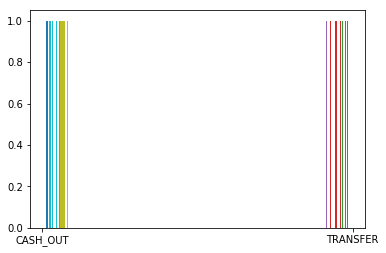

In [3]:
#worksheet = gc.open('PS_20174392719_1491204439457_log').sheet1
# Read contents of CSV file
#PS_Log_rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
#import pandas as pd
#PS_Log  = pd.DataFrame.from_records(PS_Log_rows, columns = PS_Log_rows[0])

# Taking only fraud transactions
#PS_Log = PS_Log[PS_Log["isFraud"]=="1"]
df_fraud = df.loc[df.isFraud == 1]

#PS_Log.head()
#print(PS_Log.info())

import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

type_values=df_fraud['type'].values
plt.hist(type_values)

#Behrnng: 
Almost close to 1 % of transactions flaged as fraud 

In [4]:
df.iloc[0:6].mean()   #Added just for learning 

amount            1.089501e+06
oldbalanceOrg     4.451283e+04
newbalanceOrig    5.039390e+03
oldbalanceDest    3.503804e+05
newbalanceDest    1.438174e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64

#Lets Plot
Thinking of what type of the plot that we want to present.


(array([9.48871e+05, 8.40000e+02, 1.55000e+02, 8.20000e+01, 2.60000e+01,
        1.40000e+01, 5.00000e+00, 4.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([0.00000000e+00, 3.56015889e+07, 7.12031779e+07, 1.06804767e+08,
        1.42406356e+08, 1.78007945e+08, 2.13609534e+08, 2.49211123e+08,
        2.84812711e+08, 3.20414300e+08, 3.56015889e+08]),
 <a list of 10 Patch objects>)

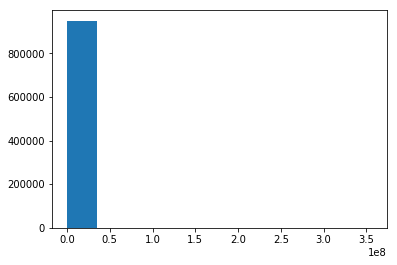

In [5]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

amount_values=df['amount'].values
plt.hist(amount_values)

%matplotlib inline
oldbalanceOrg_values=df['oldbalanceOrg'].values
plt.hist(oldbalanceOrg_values)


%matplotlib inline
newbalanceOrig_values=df['newbalanceOrig'].values
plt.hist(newbalanceOrig_values)

%matplotlib inline
oldbalanceDest_values=df['oldbalanceDest'].values
plt.hist(oldbalanceDest_values)

%matplotlib inline
newbalanceDest_values=df['newbalanceDest'].values
plt.hist(newbalanceDest_values)

In [6]:
df['amount'].values

from sklearn import preprocessing

min_max_scaler1 = preprocessing.MinMaxScaler()
np_scaled1 = min_max_scaler1.fit_transform(df[['amount']])
amount_df_normalized = pd.DataFrame(np_scaled1)
amount_df_normalized.values

min_max_scaler2 = preprocessing.MinMaxScaler()
np_scaled2 = min_max_scaler2.fit_transform(df[['oldbalanceOrg']])
oldbalanceOrg_df_normalized = pd.DataFrame(np_scaled2)
oldbalanceOrg_df_normalized.values

min_max_scaler3 = preprocessing.MinMaxScaler()
np_scaled3 = min_max_scaler3.fit_transform(df[['newbalanceOrig']])
newbalanceOrig_df_normalized = pd.DataFrame(np_scaled3)
newbalanceOrig_df_normalized.values

min_max_scaler4 = preprocessing.MinMaxScaler()
np_scaled4 = min_max_scaler4.fit_transform(df[['oldbalanceDest']])
oldbalanceDest_df_normalized = pd.DataFrame(np_scaled4)
oldbalanceDest_df_normalized.values

min_max_scaler5 = preprocessing.MinMaxScaler()
np_scaled5 = min_max_scaler5.fit_transform(df[['newbalanceDest']])
newbalanceDest_df_normalized = pd.DataFrame(np_scaled5)
newbalanceDest_df_normalized.values

array([[0.01430488],
       [0.00566424],
       [0.00225281],
       ...,
       [0.        ],
       [0.0004516 ],
       [0.        ]])

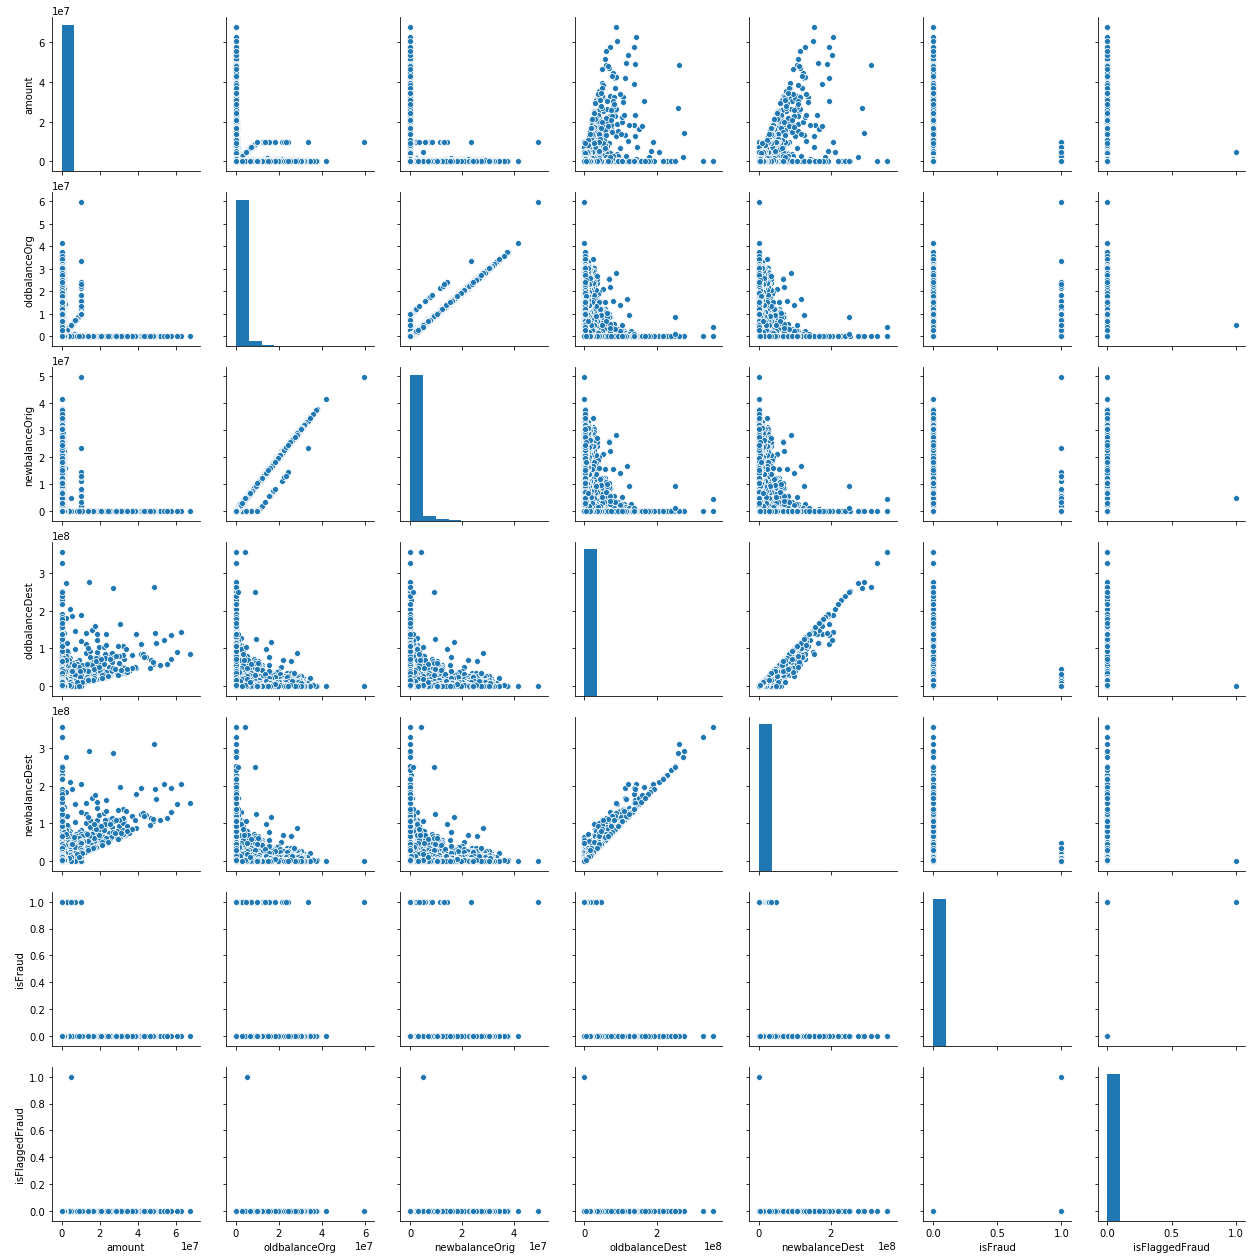

In [0]:
import seaborn as sns

%matplotlib inline
#plt.hist(amount_df_normalized.values)
#sns.distplot(amount_df_normalized.values)
#sns.distplot(amount_df_normalized.values, hist=False, rug=True)
#sns.distplot(amount_df_normalized.values, bins=40, kde=False, rug=True)
#sns.kdeplot(amount_df_normalized.values, shade=True)
#sns.distplot(amount_values, bins=40, kde=False, rug=True);

sns.pairplot(df)

Scaling

In [7]:
df.loc[df.isFraud == 1]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
201,CASH_OUT,16182.70,C1296182118,16182.70,0.00,C1650668671,0.000000e+00,1.618270e+04,1,0
165,CASH_OUT,1869237.83,C2081856005,1869237.83,0.00,C173077042,4.729243e+05,2.342162e+06,1,0
489,TRANSFER,4241.44,C1002895272,4241.44,0.00,C2080434931,0.000000e+00,0.000000e+00,1,0
296,TRANSFER,716273.17,C178061397,716273.17,0.00,C1590888168,0.000000e+00,0.000000e+00,1,0
726,TRANSFER,9065.44,C1416286172,9065.44,0.00,C1369860809,0.000000e+00,0.000000e+00,1,0
621,TRANSFER,6038051.03,C1986822150,6038051.03,0.00,C432052755,0.000000e+00,0.000000e+00,1,0
409,CASH_OUT,377096.39,C563591583,377096.39,0.00,C970254798,0.000000e+00,3.770964e+05,1,0
699,CASH_OUT,162326.52,C1532317723,162326.52,0.00,C446134087,0.000000e+00,1.623265e+05,1,0
65,TRANSFER,881811.11,C920552627,881811.11,0.00,C1105243161,0.000000e+00,0.000000e+00,1,0


In [8]:
df['IS_TRANSFER'] = 0

df['IS_CASH_OUT'] = 0
df.loc[df['type']=='TRANSFER', 'IS_TRANSFER'] =1
df.loc[df['type']=='CASH_OUT', 'IS_CASH_OUT'] =1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950000 entries, 393 to 306
Data columns (total 12 columns):
type              950000 non-null object
amount            950000 non-null float64
nameOrig          950000 non-null object
oldbalanceOrg     950000 non-null float64
newbalanceOrig    950000 non-null float64
nameDest          950000 non-null object
oldbalanceDest    950000 non-null float64
newbalanceDest    950000 non-null float64
isFraud           950000 non-null int64
isFlaggedFraud    950000 non-null int64
IS_TRANSFER       950000 non-null int64
IS_CASH_OUT       950000 non-null int64
dtypes: float64(5), int64(4), object(3)
memory usage: 94.2+ MB


# Split - Train and Test

In [9]:
y = df['isFraud'].values
y.shape


(950000,)

In [10]:
X_df = df.drop(['nameOrig', 'nameDest','isFraud','type'], axis=1)
X_df['amount']= amount_df_normalized.values

X_df['oldbalanceOrg'] = oldbalanceOrg_df_normalized.values

X_df['newbalanceOrig'] = newbalanceOrig_df_normalized.values

X_df['oldbalanceDest'] = oldbalanceDest_df_normalized.values

X_df['newbalanceDest'] = newbalanceDest_df_normalized.values
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950000 entries, 393 to 306
Data columns (total 8 columns):
amount            950000 non-null float64
oldbalanceOrg     950000 non-null float64
newbalanceOrig    950000 non-null float64
oldbalanceDest    950000 non-null float64
newbalanceDest    950000 non-null float64
isFlaggedFraud    950000 non-null int64
IS_TRANSFER       950000 non-null int64
IS_CASH_OUT       950000 non-null int64
dtypes: float64(5), int64(3)
memory usage: 65.2 MB


# 2-dimensional plot function, plot_2d_space, to see the data distribution:

In [0]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

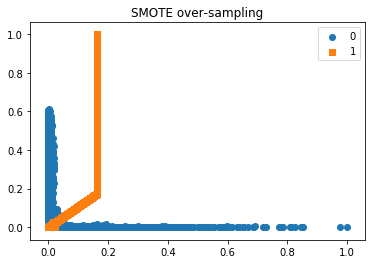

In [28]:
X = X_df.to_numpy()

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')



In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size= 0.2)
#from sklearn.model_selection import cross_val_score
#from sklearn import svm
#clf = svm.SVC(kernel='linear', C=1)

#scores = cross_val_score(clf, X, y, cv=5)

In [30]:
from sklearn.linear_model import SGDClassifier

#sgd stands for stochastic gradient descent (read more about GSD https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd)
#clf stands for classifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
from sklearn.model_selection import cross_val_score

# Fit the model with CS=3

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")



array([0.78281285, 0.78292902, 0.78233812])

In [32]:
# Now, lets use the SGD model and evaluate its performance!

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print(y_train_pred)

[1 1 0 ... 1 1 1]


# Calculating ROC Curve and AUC

In [0]:
#from sklearn.neighbors import KNeighborsClassifier
## fit a model
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(X_train, y_train)

#Building a Decision tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
#r = export_text(tree_clf, X=iris['feature_names'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Run prediction

In [0]:
y_pred = tree_clf.predict(X_test)

### #Evaluate the model - Accuracy

In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.622030334331127


# Visualizing Decision Tree

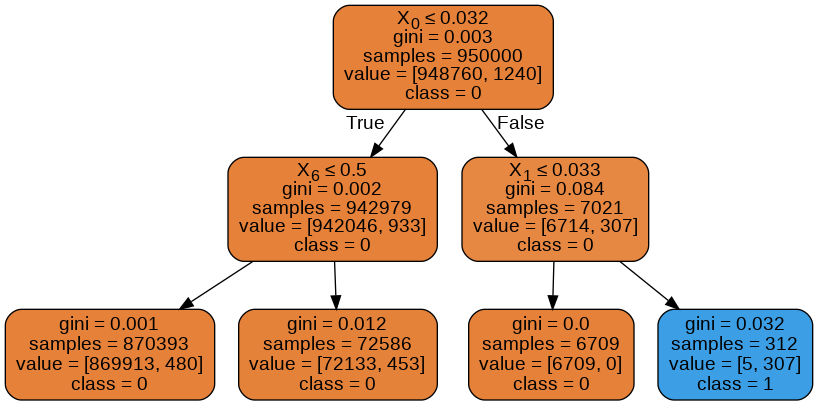

In [36]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Random Forest Classifier

In [37]:

from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rnd_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rnd_clf.fit(X_train,y_train)

y_pred=rnd_clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9992147645347612


Predict

In [0]:
#clf.predict(y_pred)

# Voting Classifier

In [38]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('dt', tree_clf), ('rf', rnd_clf), ('sgc', sgd_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=2,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=42,
                                                     splitter='best')),
           

In [39]:
from sklearn.metrics import accuracy_score

for clf in (tree_clf, rnd_clf, sgd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("train:",clf.__class__.__name__, accuracy_score(y_train, clf.predict(X_train)))
    print("test:",clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print("==================================================================")
    print("==================================================================")
    print("==================================================================")

train: DecisionTreeClassifier 0.8950103292718917
test: DecisionTreeClassifier 0.8940380075045322
train: RandomForestClassifier 0.9999301720139973
test: RandomForestClassifier 0.9991910493697036
train: SGDClassifier 0.782701236350605
test: SGDClassifier 0.782207829166491
train: VotingClassifier 0.9478431057380159
test: VotingClassifier 0.9474419241957924


# Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier
# Create 500 decision tree each with 100 sample and aggregate the results.
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9677737257051309


# Ada Boost

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             